In [135]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [136]:
df= pd.read_csv(r"C:\Users\online\Downloads\weather data\seattle-weather.csv")

In [137]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [138]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [139]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [141]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [142]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [143]:
df.value_counts()

date        precipitation  temp_max  temp_min  wind  weather
2012-01-01  0.0            12.8       5.0      4.7   drizzle    1
2014-09-09  0.0            21.7       13.3     2.3   sun        1
2014-09-07  0.0            28.3       13.3     2.1   sun        1
2014-09-06  0.0            32.2       15.0     2.9   sun        1
2014-09-05  0.0            27.8       13.9     6.5   fog        1
                                                               ..
2013-04-30  0.0            12.8       4.4      2.4   sun        1
2013-04-29  3.8            13.9       6.7      4.2   rain       1
2013-04-28  1.0            15.0       9.4      5.2   rain       1
2013-04-27  0.0            13.9       10.6     5.9   sun        1
2015-12-31  0.0            5.6       -2.1      3.5   sun        1
Name: count, Length: 1461, dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [145]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [146]:
#coverting float to int 
df['precipitation'] = df['precipitation'].astype(int)
df['temp_max'] = df['temp_max'].astype(int)
df['temp_min'] = df['temp_min'].astype(int)
df['wind'] = df['temp_max'].astype(int)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1461 non-null   object
 1   precipitation  1461 non-null   int32 
 2   temp_max       1461 non-null   int32 
 3   temp_min       1461 non-null   int32 
 4   wind           1461 non-null   int32 
 5   weather        1461 non-null   object
dtypes: int32(4), object(2)
memory usage: 45.8+ KB


In [148]:
df.drop(["date"],axis=1,inplace=True)

In [149]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0,12,5,12,drizzle
1,10,10,2,10,rain
2,0,11,7,11,rain
3,20,12,5,12,rain
4,1,8,2,8,rain
...,...,...,...,...,...
1456,8,4,1,4,rain
1457,1,5,1,5,rain
1458,0,7,0,7,fog
1459,0,5,-1,5,sun


In [150]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [151]:
#encoding datachecking categorical dataset
df.replace({"weather":{'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog':4,}},inplace= True)

In [152]:
df.head(5)

,precipitation,temp_max,temp_min,wind,weather
0,0,12,5,12,0
1,10,10,2,10,1
2,0,11,7,11,1
3,20,12,5,12,1
4,1,8,2,8,1


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   precipitation  1461 non-null   int32
 1   temp_max       1461 non-null   int32
 2   temp_min       1461 non-null   int32
 3   wind           1461 non-null   int32
 4   weather        1461 non-null   int64
dtypes: int32(4), int64(1)
memory usage: 34.4 KB


In [154]:
x = df.drop([ 'weather'],axis=1)
y = df["weather"]

In [155]:
x

,precipitation,temp_max,temp_min,wind
0,0,12,5,12
1,10,10,2,10
2,0,11,7,11
3,20,12,5,12
4,1,8,2,8
...,...,...,...,...
1456,8,4,1,4
1457,1,5,1,5
1458,0,7,0,7
1459,0,5,-1,5


In [156]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1456    1
1457    1
1458    4
1459    2
1460    2
Name: weather, Length: 1461, dtype: int64

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [158]:
x_train

,precipitation,temp_max,temp_min,wind
1066,0,5,-3,5
638,18,13,10,13
799,18,12,6,12
380,0,6,0,6
303,34,15,12,15
...,...,...,...,...
1130,8,10,4,10
1294,0,33,17,33
860,0,15,7,15
1459,0,5,-1,5


In [159]:
x_test

,precipitation,temp_max,temp_min,wind
892,0,23,11,23
1105,5,7,6,7
413,0,9,4,9
522,0,26,12,26
1036,1,13,7,13
...,...,...,...,...
1361,0,20,8,20
802,0,13,5,13
651,0,15,6,15
722,1,11,6,11


In [160]:
y_train

1066    4
638     1
799     1
380     2
303     1
       ..
1130    1
1294    2
860     1
1459    2
1126    4
Name: weather, Length: 1168, dtype: int64

In [161]:
y_test

892     2
1105    1
413     1
522     2
1036    1
       ..
1361    2
802     1
651     4
722     1
254     2
Name: weather, Length: 293, dtype: int64

In [179]:
lin_reg_model = LogisticRegression()

In [180]:
lin_reg_model.fit(x_train, y_train)

C:\Users\online\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
# test data set prediction
test_data_prediction = lin_reg_model.predict(x_train)

In [182]:
error_score = metrics.r2_score(y_train,test_data_prediction)*100
print("R squred error :", error_score)

R squred error : 22.248165610829794


<function matplotlib.pyplot.show(close=None, block=None)>

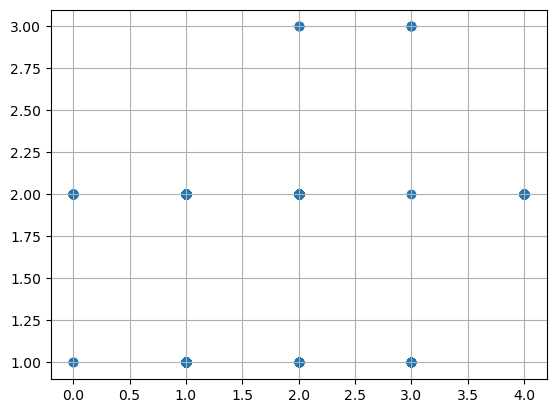

In [183]:
plt.scatter(y_train, test_data_prediction)
plt.grid()
plt.show

In [184]:
import pickle

saved_model = pickle.dumps(lin_reg_model)
Boston_Housing_from_pickle = pickle.loads(saved_model)
Boston_Housing_from_pickle.predict(x_test)

array([2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2], dtype=int64)

In [185]:
print(lin_reg_model.predict([[18,11,7,11]]))

[1]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [186]:
lin_reg_model.predict([[0,12.8,5,4.7]])

C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [187]:
lin_reg_model.predict([[0,5,-3,5]])

C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [188]:
lin_reg_model.predict([[18,13,10,6]])

C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [189]:
lin_reg_model.predict([[0,7,3,1]])

C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [190]:
x.head(40)

,precipitation,temp_max,temp_min,wind
0,0,12,5,12
1,10,10,2,10
2,0,11,7,11
3,20,12,5,12
4,1,8,2,8
5,2,4,2,4
6,0,7,2,7
7,0,10,2,10
8,4,9,5,9
9,1,6,0,6


In [191]:
y.head(40)

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     1
9     1
10    2
11    2
12    2
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    1
21    1
22    1
23    1
24    1
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    2
33    2
34    2
35    2
36    2
37    1
38    1
39    1
Name: weather, dtype: int64

In [196]:
print(lin_reg_model.predict([[27,9,3,9]]))

[1]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [193]:
print(lin_reg_model.predict([[0,15,7,15]]))

[2]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [194]:
print(lin_reg_model.predict([[2,11,7,11]]))

[1]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [195]:
print(lin_reg_model.predict([[4,4,0,4]]))

[1]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
